<a href="https://colab.research.google.com/github/NancyPatel11/Lets-Learn-Git/blob/main/Project_2_gender_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('smoking_driking_dataset_Ver01.csv')
pd.options.display.max_columns = None

**Exploratory Data Analysis (EDA)**
---



In [ ]:
df.shape

(991346, 24)

In [ ]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,98.0,136.0,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,95.0,201.0,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,101.0,199.0,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [ ]:
df.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [ ]:
df.dtypes

sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left           float64
hear_right          float64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           float64
triglyceride        float64
hemoglobin          float64
urine_protein       float64
serum_creatinine    float64
SGOT_AST            float64
SGOT_ALT            float64
gamma_GTP           float64
SMK_stat_type_cd    float64
DRK_YN               object
dtype: object

Here, only two features `sex` and `DRK_YN` are categorical (datatype object) but according to our dataset, `SMK_stat_type_cd`, `urine_protein`, `hear_left` and `hear right` are also categorical but they are already encoded to numeric values.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

The describe() function which provides basic statistics about the numeric attributes in the DataFrame. It includes metrics like count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum.

In [ ]:
df.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,100.424447,195.557020,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,24.179960,38.660155,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,25.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,88.000000,169.000000,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,96.000000,193.000000,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,105.000000,219.000000,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,852.000000,2344.000000,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


In [9]:
categorical_columns = ['sex', 'DRK_YN', 'SMK_stat_type_cd', 'urine_protein', 'hear_left', 'hear_right']

In [ ]:
def print_unique_values(df, categorical_columns):
  for col in categorical_columns:
      print(f'{col}: {df[col].unique()}')

In [ ]:
print_unique_values(df, categorical_columns)

sex: ['Male' 'Female']
DRK_YN: ['Y' 'N']
SMK_stat_type_cd: [1. 3. 2.]
urine_protein: [1. 3. 2. 4. 5. 6.]
hear_left: [1. 2.]
hear_right: [1. 2.]


`SMK_stat_type_cd` shows the status of smoking where,

1 - Never

2 - used to smoke but quit

3 - still smoke

`urine_protein` shows the amount of protein in urine,

1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4)

`hear_left` shows the hearing where

1 - normal

2 - abnormal


`hear_right` shows the hearing where

1 - normal

2 - abnormal


**BOX PLOTS**

Box Plot displays the five-number summary of a set of data with the help of a box and a few verticle lines.

* Minimum: Q1-1.5*IQR
* 1st quartile (Q1): 25th percentile
* Median:50th percentile
* 3rd quartile(Q3):75th percentile
* Maximum: Q3+1.5*IQR

IQR - Inter Quartile Range (region between 1st quartile and 3rd quartile). 50% of the total data lies in this region.

The box plot also allows to discover the outliers, the points beyond the vertical lines, i.e. the points lying in Minimum and Maximum regions.

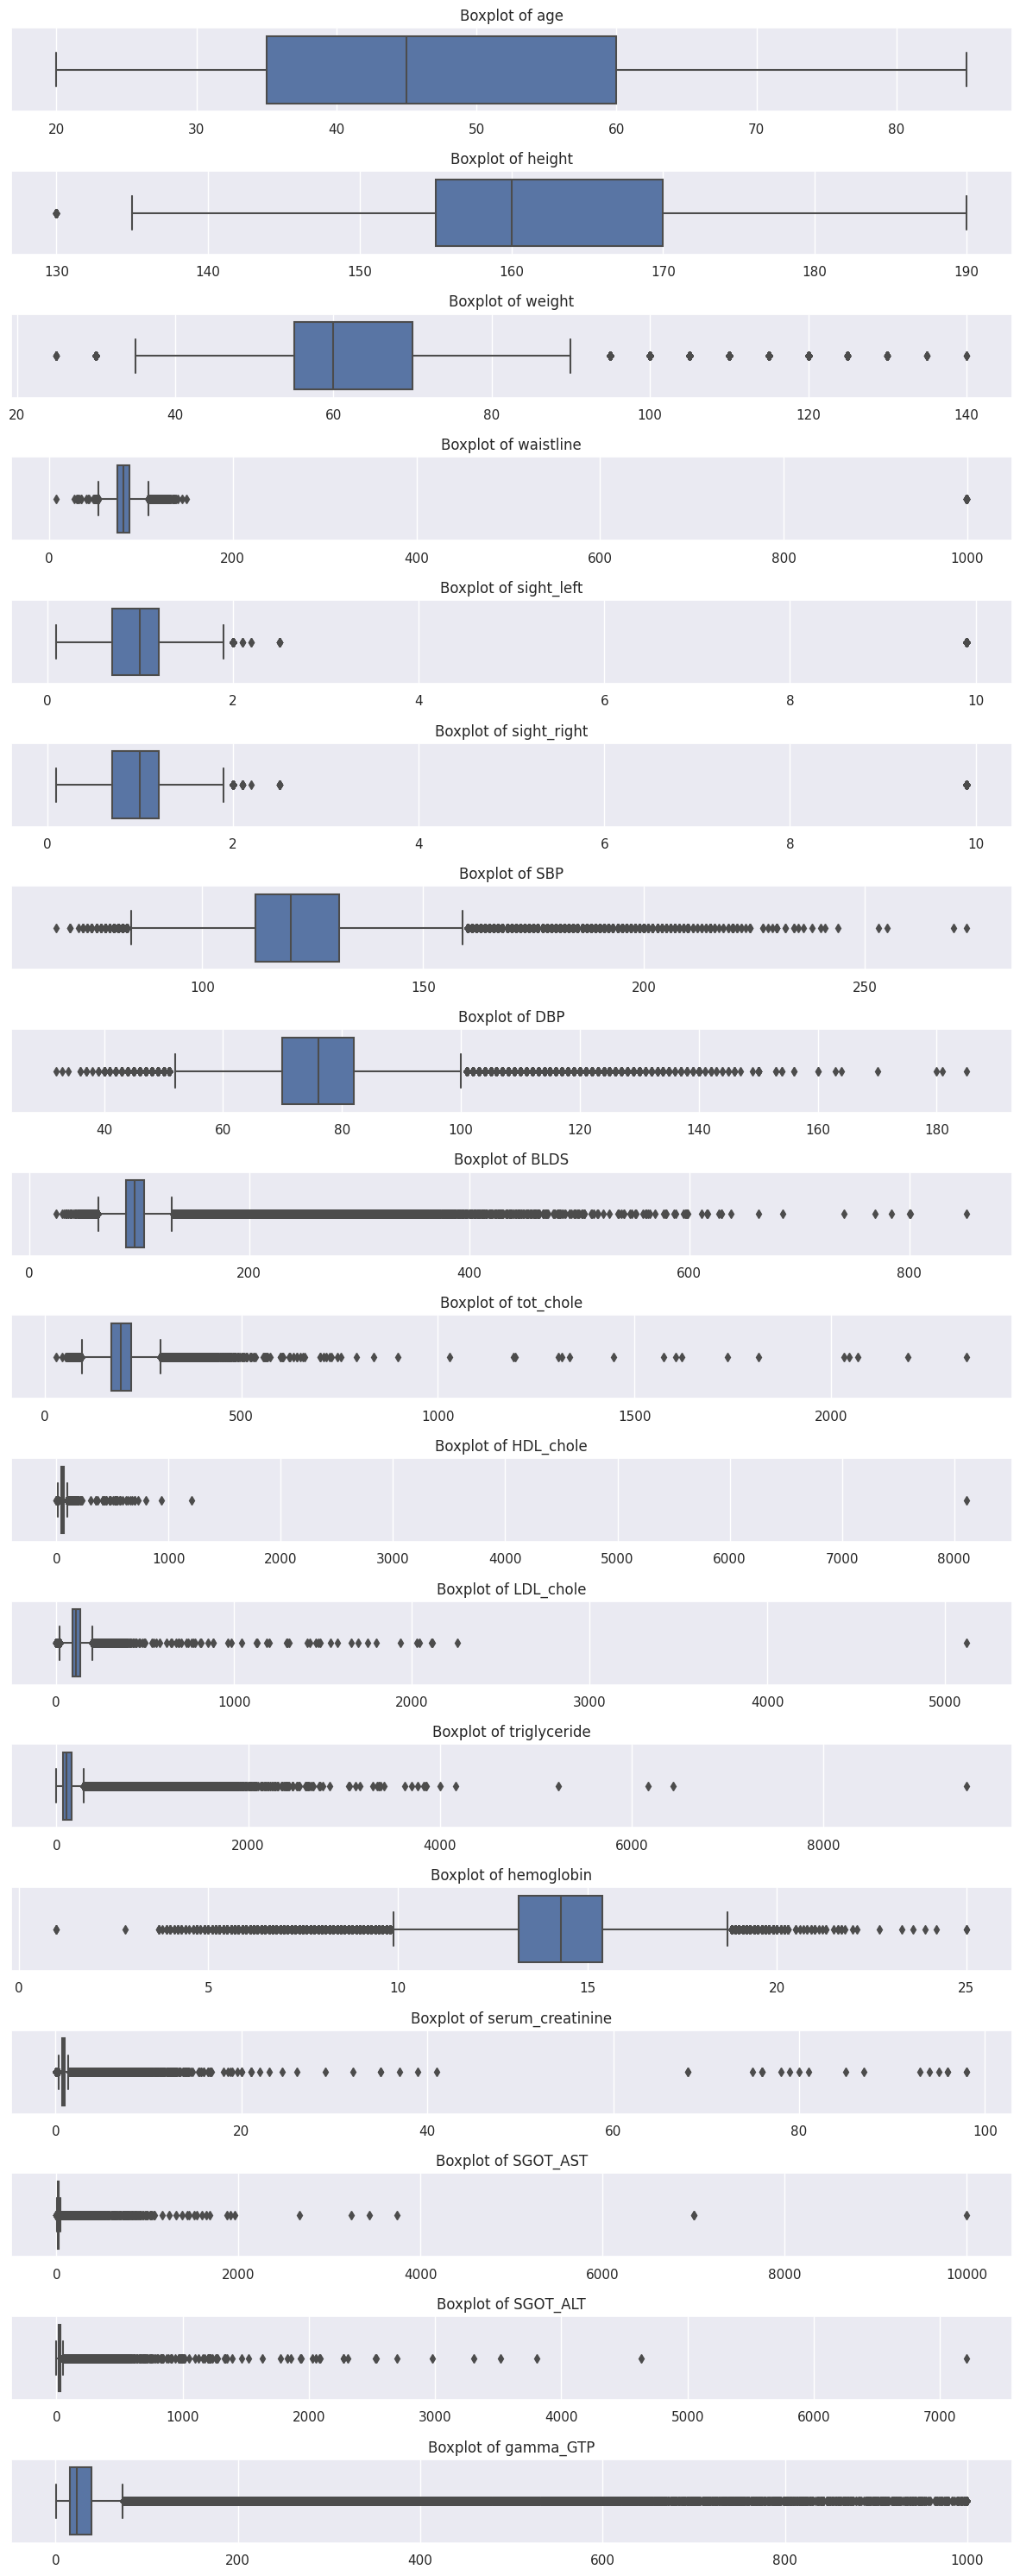

In [10]:
sns.set_theme(style="darkgrid")

fig, axes = plt.subplots(18, 1, figsize=(12, 30))

axes = axes.flatten()

numeric_columns = [col for col in df if col not in categorical_columns]

for ax, col in zip(axes, numeric_columns):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [ ]:
def calculate_bound(df, col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)

  IQR = q3 - q1
  lower_bound = q1 - 1.5 * IQR
  upper_bound = q3 + 1.5 * IQR

  return (lower_bound, upper_bound)


In [ ]:
print('Outlier in percentage')
for col in numeric_columns:
    count=0
    lower_bound, upper_bound = calculate_bound(df, col)
    for val in df[col]:
        if val<lower_bound or val>upper_bound:
            count=count+1

    print(col+' : '+str(count/len(df[col])*100)+' %')


Outlier in percentage
age : 0.0 %
height : 0.008675074091185116 %
weight : 1.9388790593798735 %
waistline : 0.4455558402414495 %
sight_left : 1.168310559582628 %
sight_right : 1.0586616579882302 %
SBP : 1.5974241082326455 %
DBP : 1.323654909587571 %
BLDS : 6.476245427933335 %
tot_chole : 1.1396626404908075 %
HDL_chole : 1.3978974041353878 %
LDL_chole : 1.0186150950324107 %
triglyceride : 5.457630332900925 %
hemoglobin : 0.9845200363949621 %
serum_creatinine : 0.8074880011620565 %
SGOT_AST : 6.820423948853377 %
SGOT_ALT : 7.356462829324978 %
gamma_GTP : 9.496381687120339 %


Only features `BLDS`, `triglyceride`, `SGOT_AST`, `SGOT_ALT`, `gamma_GTP` have a slightly significant outlier data of about 5-10%.

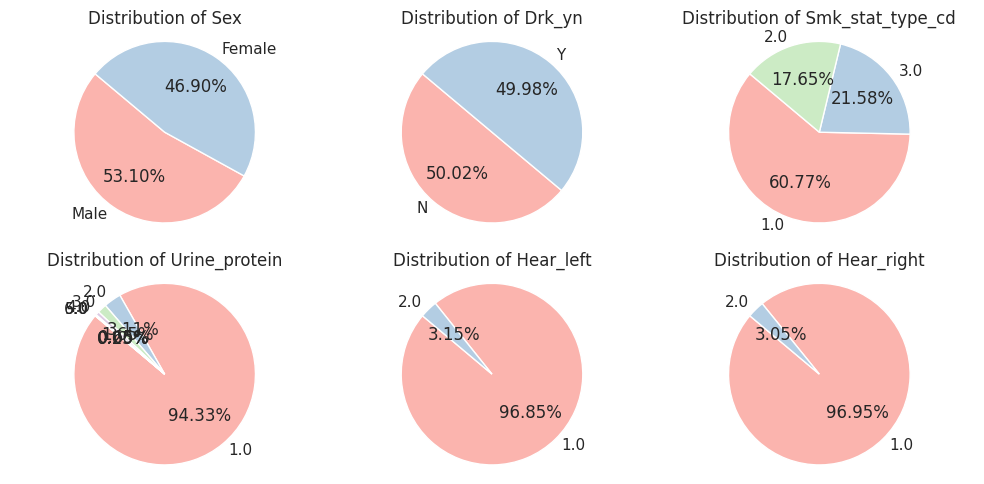

In [ ]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(2, 3, figsize=(10, 5))

color_palette = sns.color_palette('Pastel1')

axes = axes.flatten()

for idx, feature in enumerate(categorical_columns):
    feature_counts = df[feature].value_counts()
    labels = feature_counts.index
    sizes = feature_counts.values
    colors = color_palette[:len(labels)]

    ax = axes[idx]

    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
    ax.set_title(f'Distribution of {feature.capitalize()}')
    ax.axis('equal')

for i in range(len(categorical_columns), 2):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

From above pie charts we can see that there is an almost equal distribution for `sex` and `Drk_yn` (drinker status).

The data for `urine_protein`, `hear_left` and `hear_right` is biased with one value occuring more than 90% of the time.

Distribution of smoker status is imbalanced, with a significant majority of the data falling into the Value 1 category.

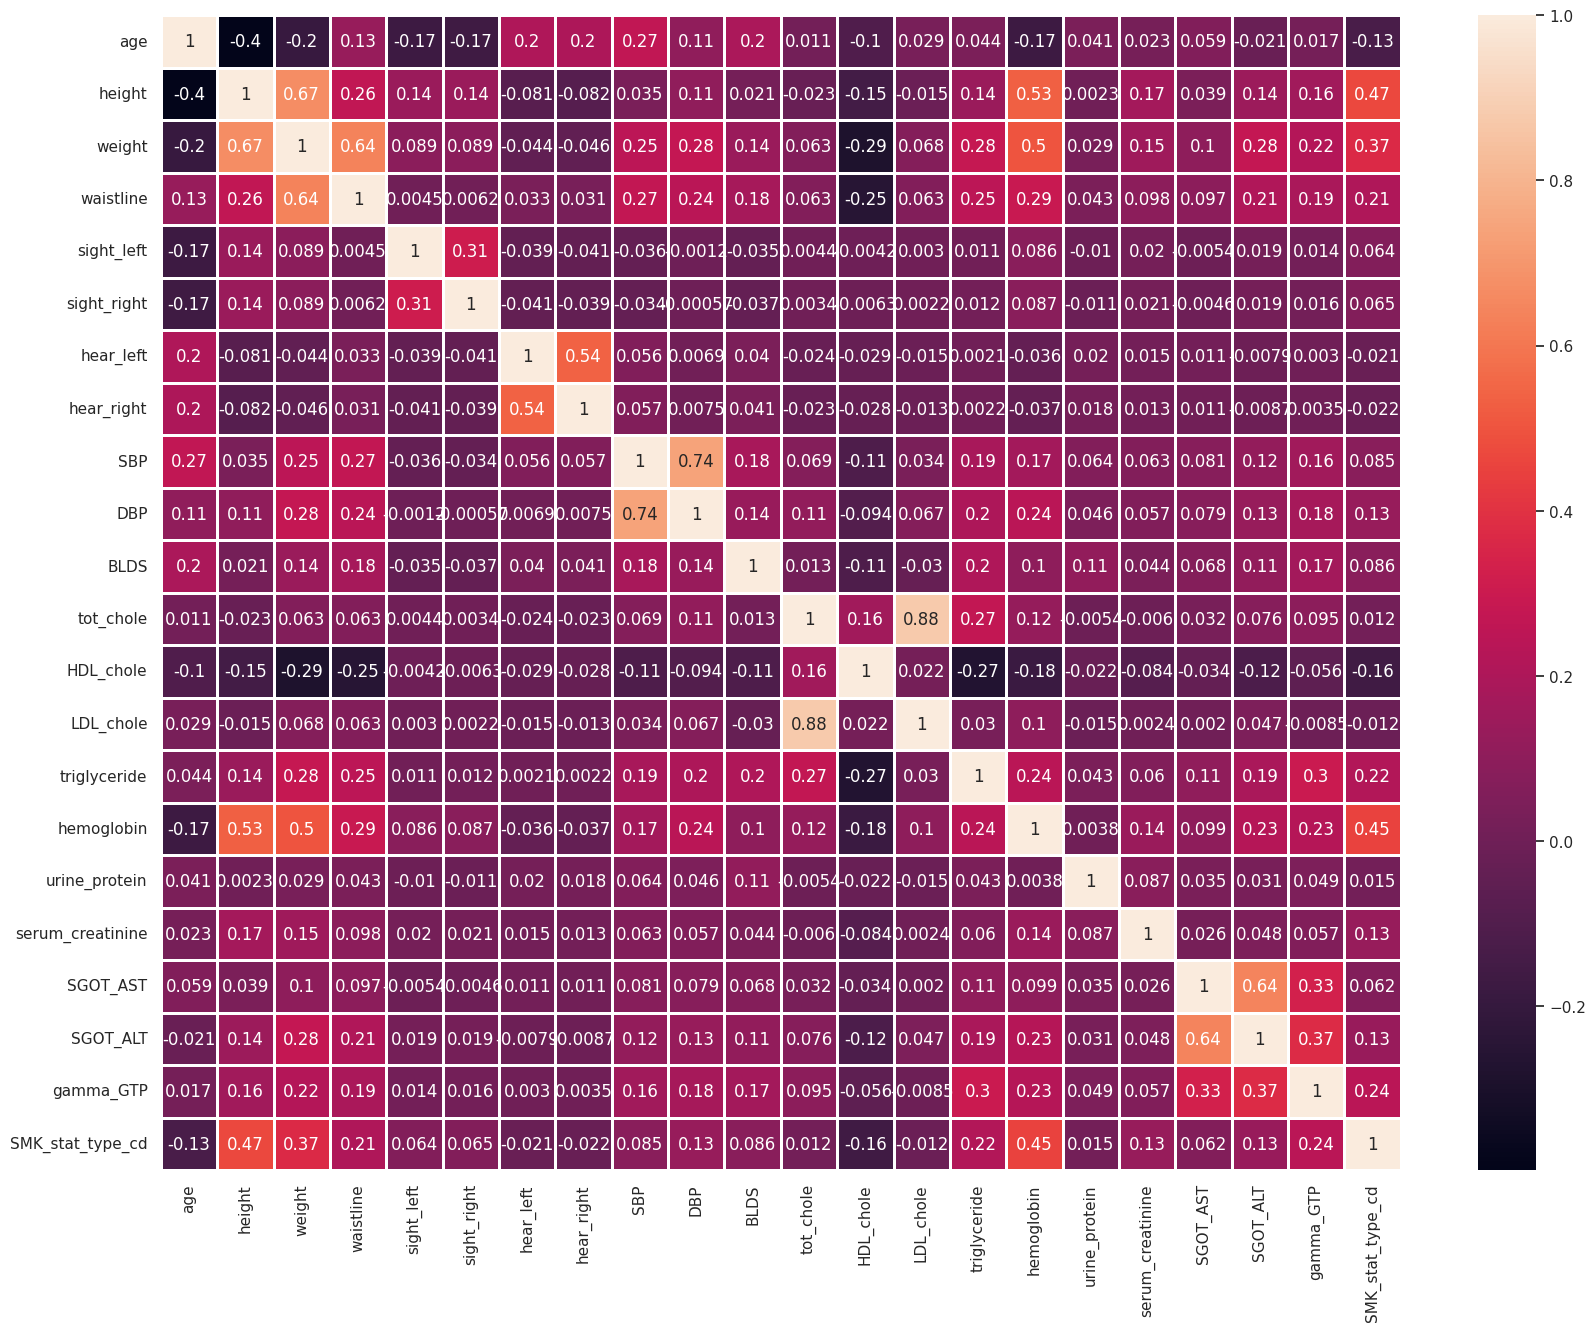

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=1)
plt.show()

There is a significant correlation between

1. `age`, `height` and `weight`

2. `SMK_stat_type_cd`, `height`, `weight`

3. `hemoglobin`, `height`, `weight`

4. `HDL_chole`, `weight`, `waistline`

5. `hear_left`, `hear_right` and `age`

6. `sight_left`, `sight_right` and `age`

7. `LDL_chole` and `tot_chole`

8. `DBP` and `SBP`

9. `SGOT_ALT` and `SGOT_AST`

10. `triglyceride`, `tot_chole`, `HDL_chole`




The following scatterplots give a better understanding for these relations.

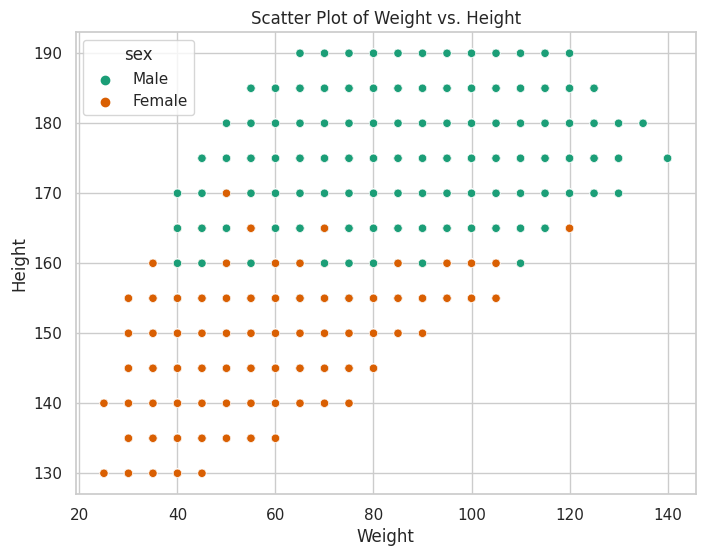

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='weight', y='height', data=df, hue='sex', palette='Dark2')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Scatter Plot of Weight vs. Height')
plt.show()

We can observe that `height` and `weight` of males is generally more than females.

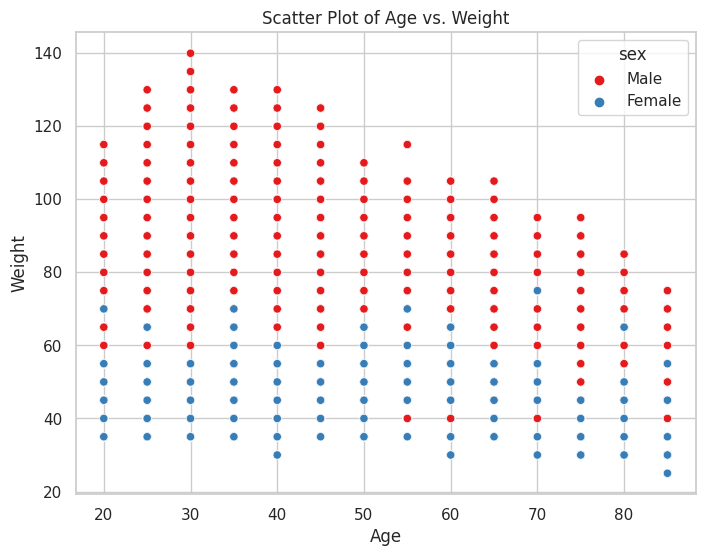

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='weight', data=df, hue='sex', palette='Set1')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Scatter Plot of Age vs. Weight')
plt.show()

We can observe that `weight` of males is generally more than females.

Also, as `age` increases, `weight` decreases.

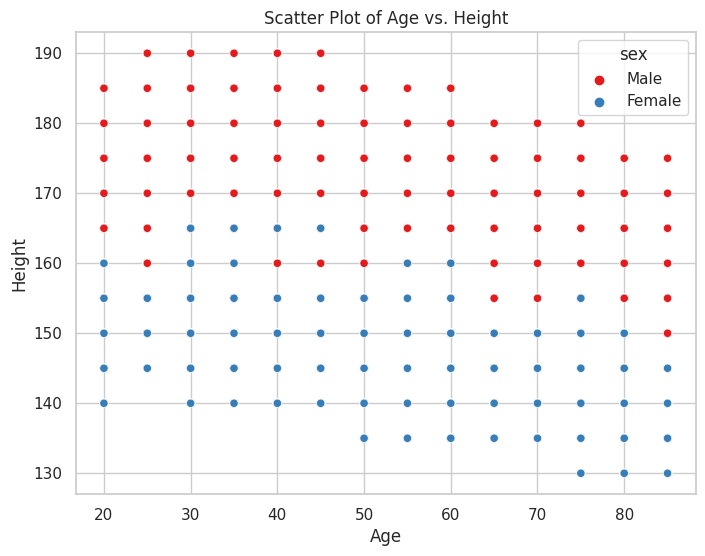

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='height', data=df, hue='sex', palette='Set1')
plt.xlabel('Age')
plt.ylabel('Height')
plt.title('Scatter Plot of Age vs. Height')
plt.show()

We can observe that `height` of males is generally more than females.

Also, as `age` increases, `height` decreases.

<Axes: xlabel='height', ylabel='weight'>

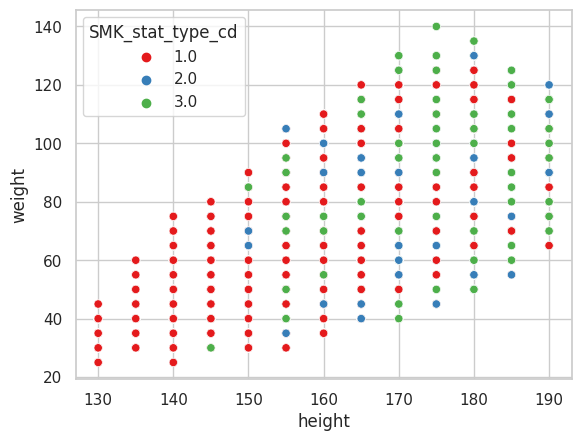

In [ ]:
sns.scatterplot(y='weight', x='height', hue="SMK_stat_type_cd", data=df, palette='Set1')

We can see that there is a positive correlation between `height` and `weight`. As `height` increases, `weight` increases too.

Also we can see that most of the instances have smoking status 1 (never smoked).

<Axes: xlabel='height', ylabel='weight'>

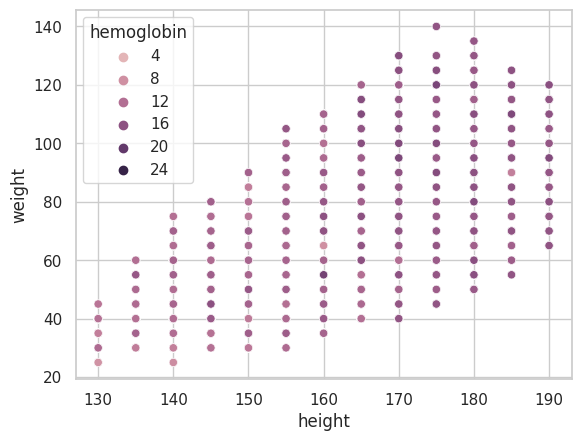

In [ ]:
sns.scatterplot(y='weight', x='height', hue="hemoglobin", data=df)

We can see that majority of the instances have `hemoglobin` 12-16.

<Axes: xlabel='weight', ylabel='waistline'>

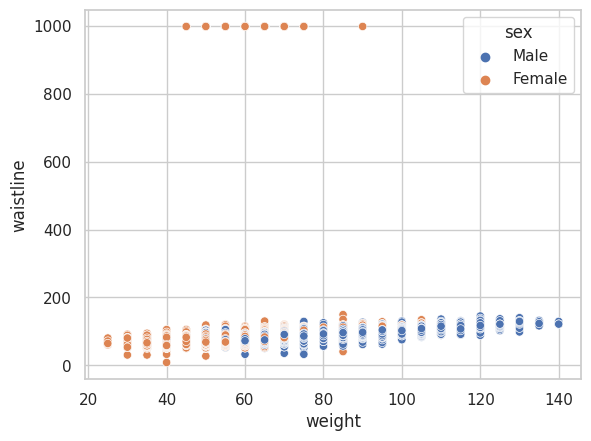

In [ ]:
sns.scatterplot(x='weight', y='waistline', hue='sex', data=df)

A positive correlation can be seen between `weight` and `waistline`. As the `weight` increases, `waistline` also increases.

Also, males have higher weights compared to females according to this graph.

<Axes: xlabel='sight_right', ylabel='sight_left'>

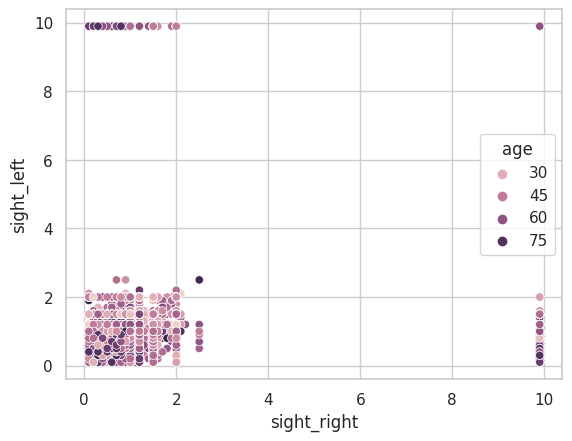

In [ ]:
sns.scatterplot(y='sight_left', x='sight_right', hue="age", data=df)

`sight_right` increases with increase in `sight_left`.

<Axes: xlabel='LDL_chole', ylabel='tot_chole'>

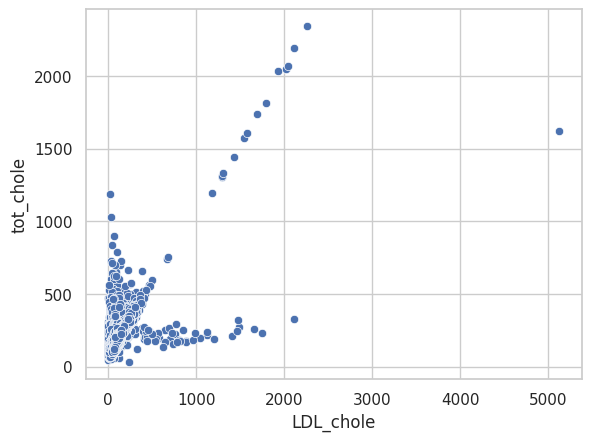

In [ ]:
sns.scatterplot(x='LDL_chole', y='tot_chole', data=df)

A positive correlation can be seen between `LDL_chole`(LDL cholestrol) and `tot_chole`(total cholestrol).

<Axes: xlabel='DBP', ylabel='SBP'>

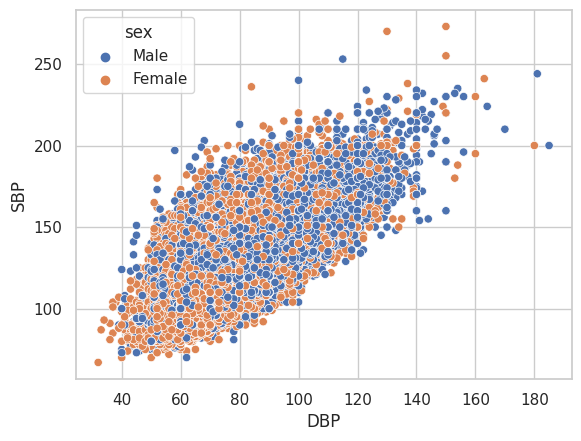

In [ ]:
sns.scatterplot(x='DBP', y='SBP', hue='sex', data=df)

`DBP` (Diastolic Blood Pressure) increases with an increase in `SBP` (Systolic Blood Pressure)

Also we can see that females have lower Blood pressures compared to males.

<Axes: xlabel='SGOT_ALT', ylabel='SGOT_AST'>

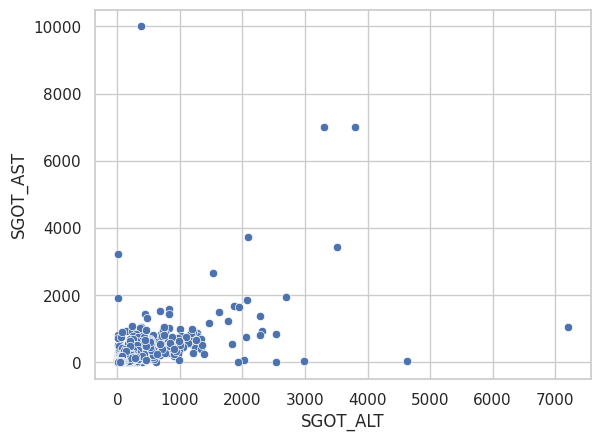

In [ ]:
sns.scatterplot(x='SGOT_ALT', y='SGOT_AST', data=df)

<Axes: xlabel='triglyceride', ylabel='tot_chole'>

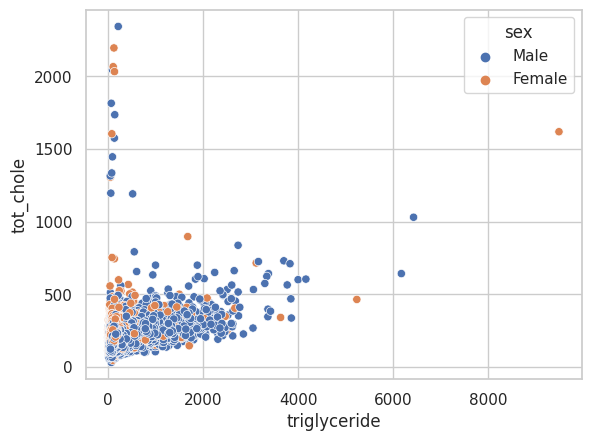

In [ ]:
sns.scatterplot(x='triglyceride', y='tot_chole',hue='sex', data=df)

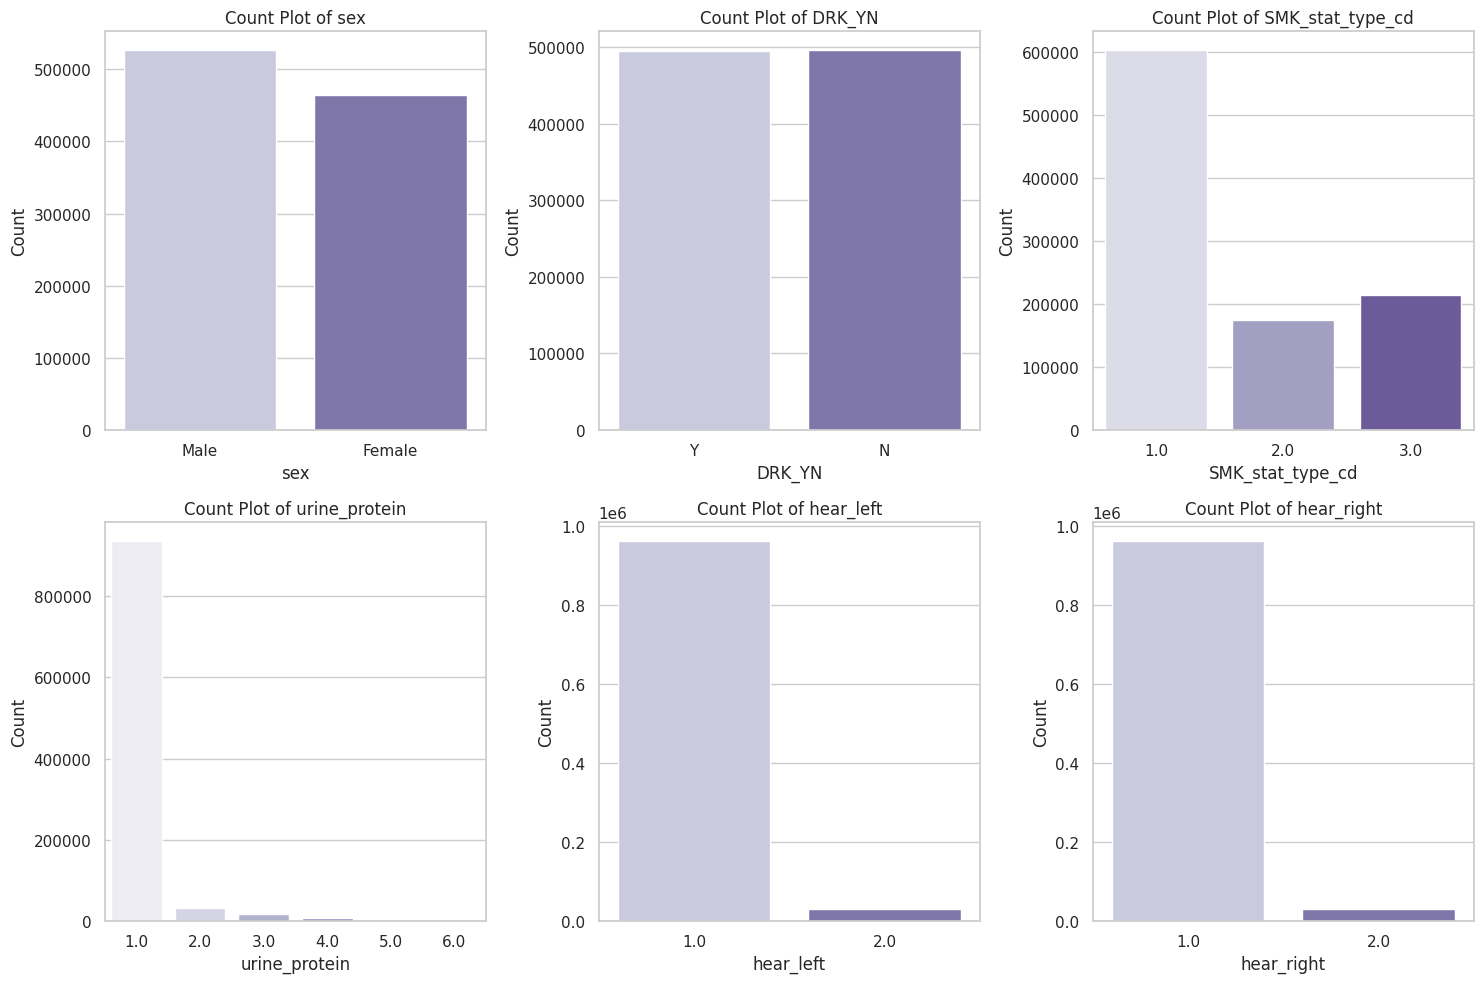

In [ ]:
features = categorical_columns

num_plots = len(features)
num_cols = 3
num_rows = (num_plots // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

for i, feature in enumerate(features):
    ax = axes[i // num_cols, i % num_cols]

    sns.countplot(x=feature, data=df, ax=ax, palette='Purples')

    ax.set_title(f'Count Plot of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

# Removing empty subplots
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

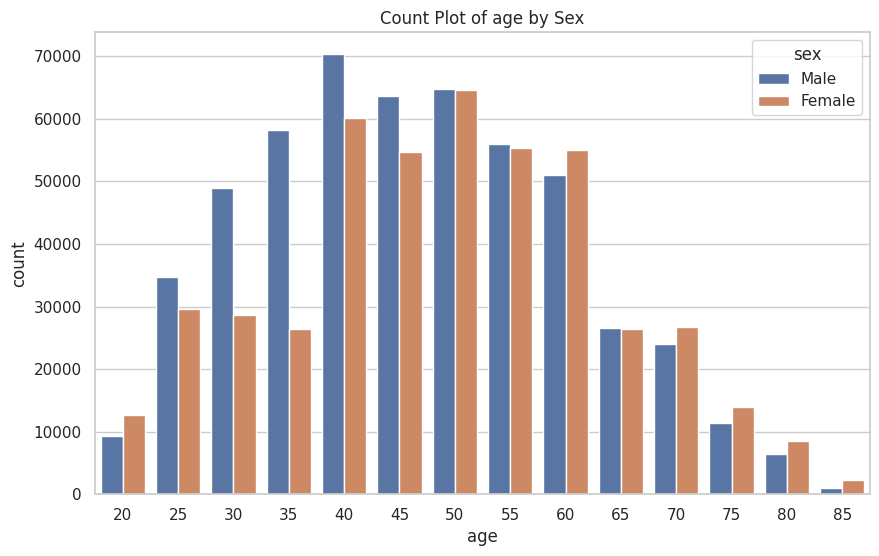

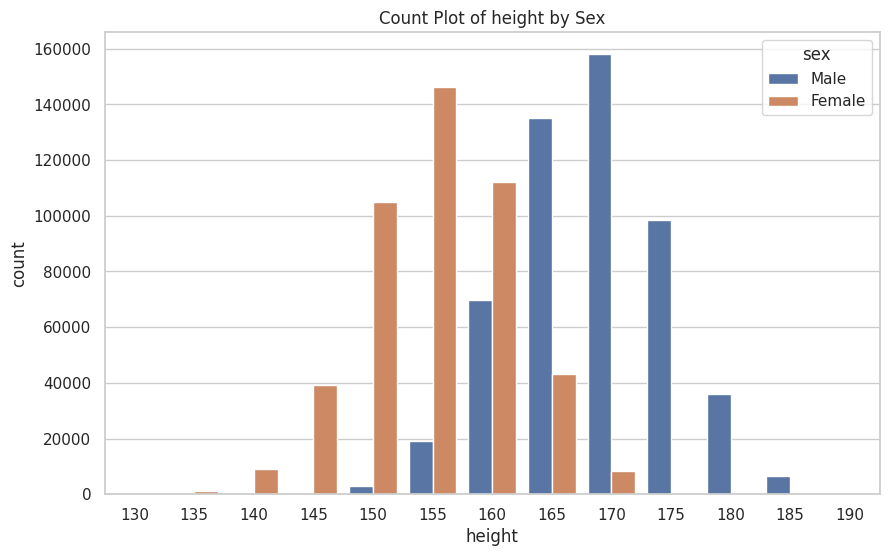

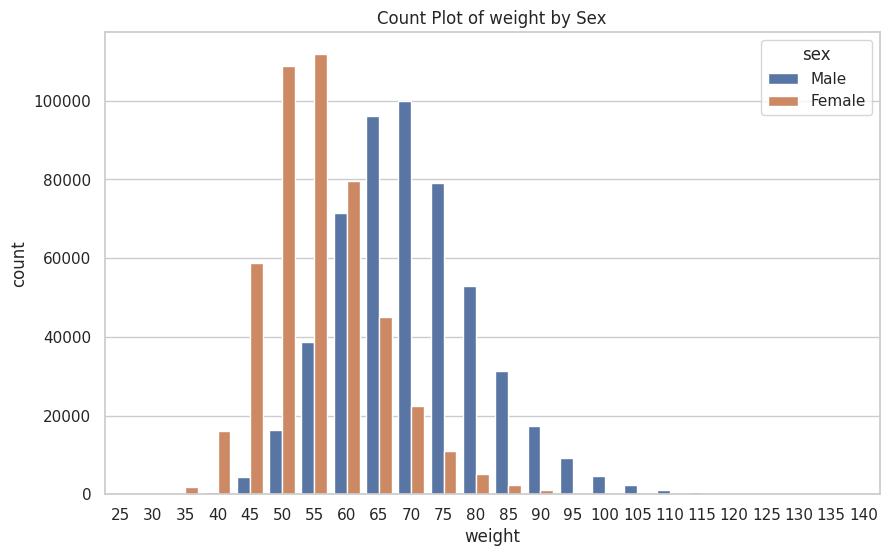

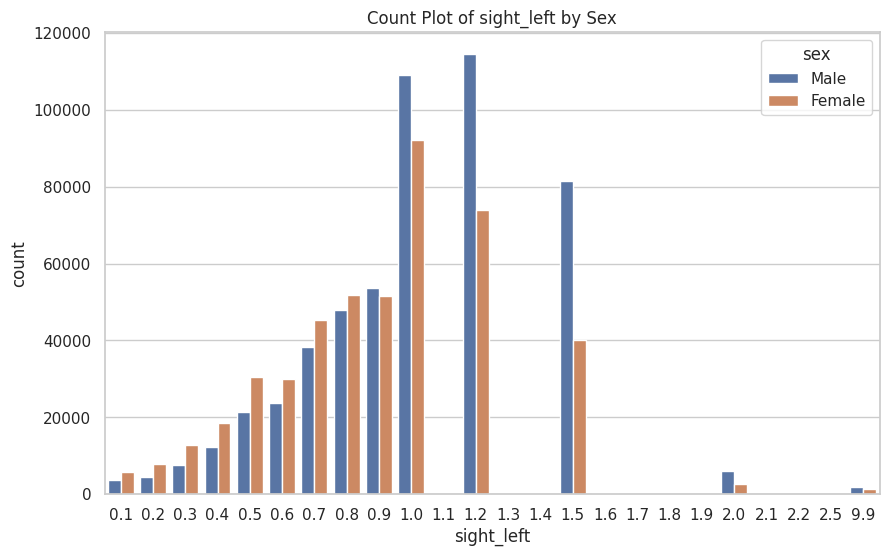

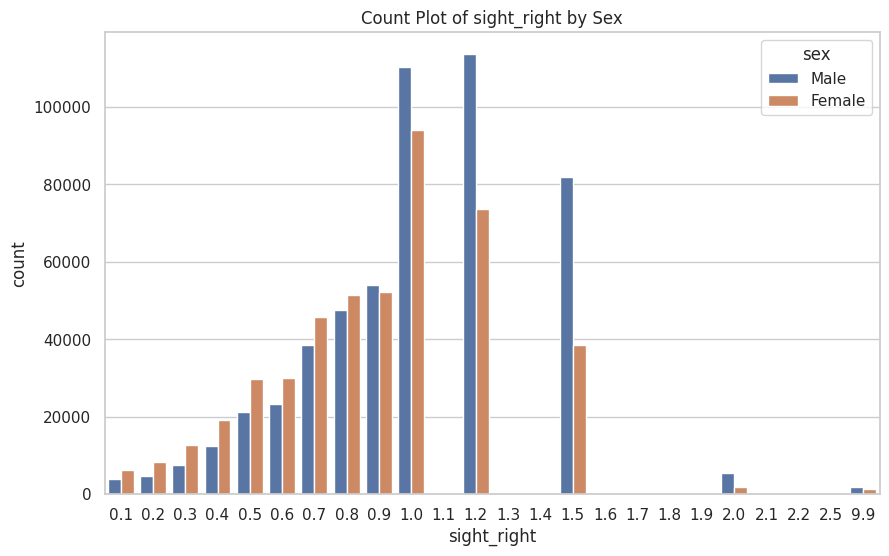

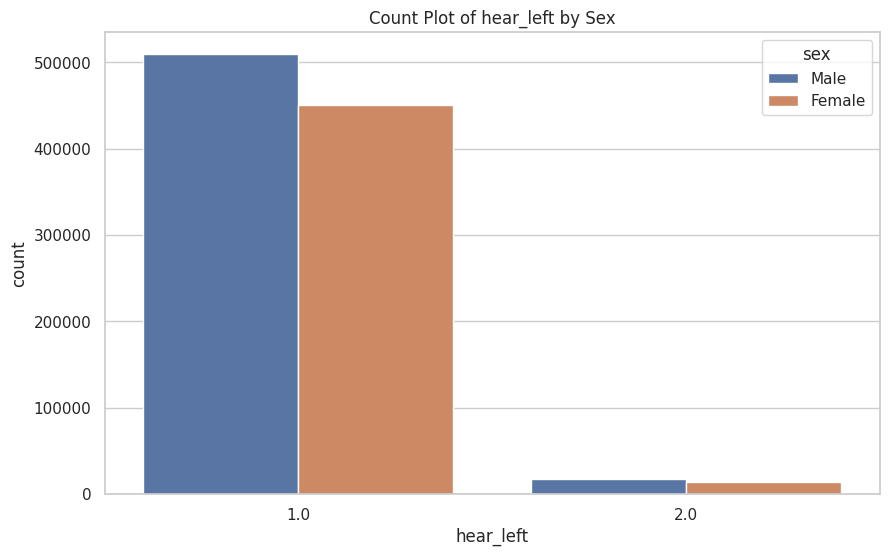

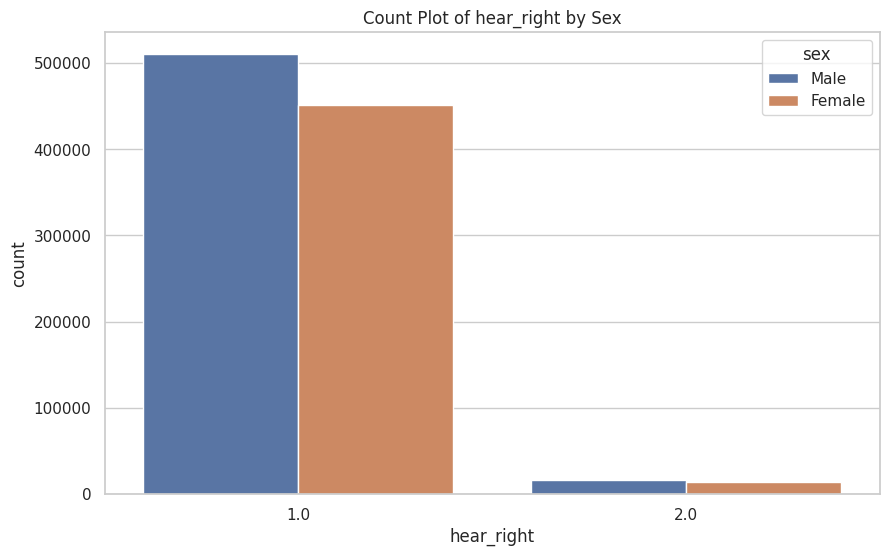

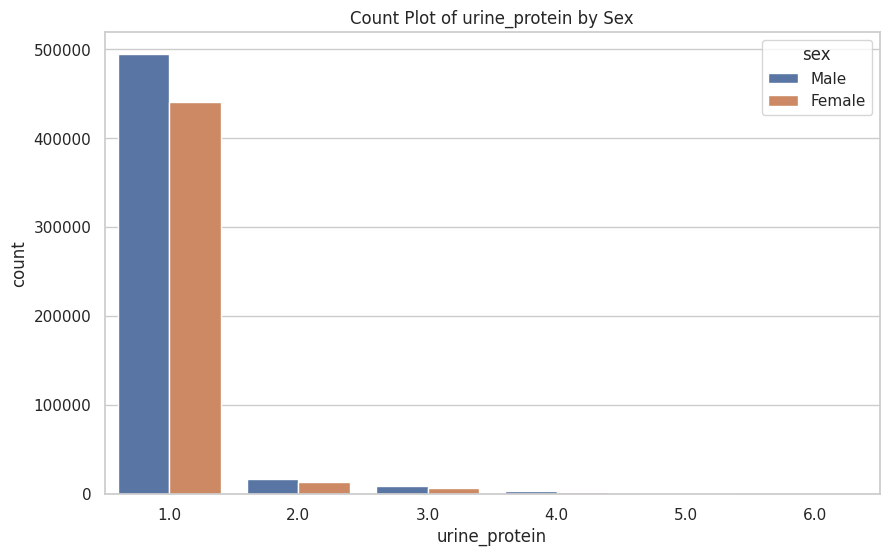

In [ ]:
columns = ['age', 'height', 'weight', 'sight_left', 'sight_right', 'hear_left', 'hear_right', 'urine_protein']
for col in columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='sex', data=df)
    plt.title(f'Count Plot of {col} by Sex')
    plt.show()


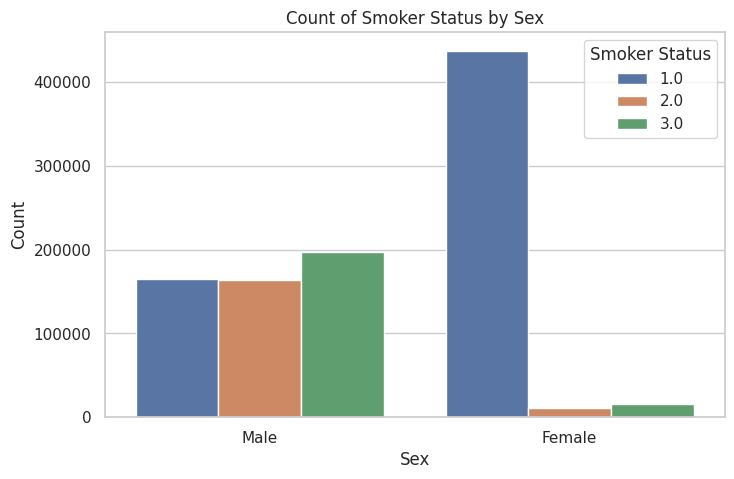

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', hue='SMK_stat_type_cd', data=df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Smoker Status by Sex')
plt.legend(title='Smoker Status')
plt.show()

In [ ]:
Smoking_sex = df.groupby(['sex', 'SMK_stat_type_cd'], as_index=False).agg(n = ('sex', 'count'))
Smoking_sex.head(6)

,sex,SMK_stat_type_cd,n
0,Female,1.0,437760
1,Female,2.0,10923
2,Female,3.0,16248
3,Male,1.0,164681
4,Male,2.0,164028
5,Male,3.0,197706


From the countplot and table above, we can see that there is a more uniform distribution about smoking status among male.

In case of females, majority of them have smoking status 1 (never smoke) and only a very small fraction of females used to smoke or have quit smoking.


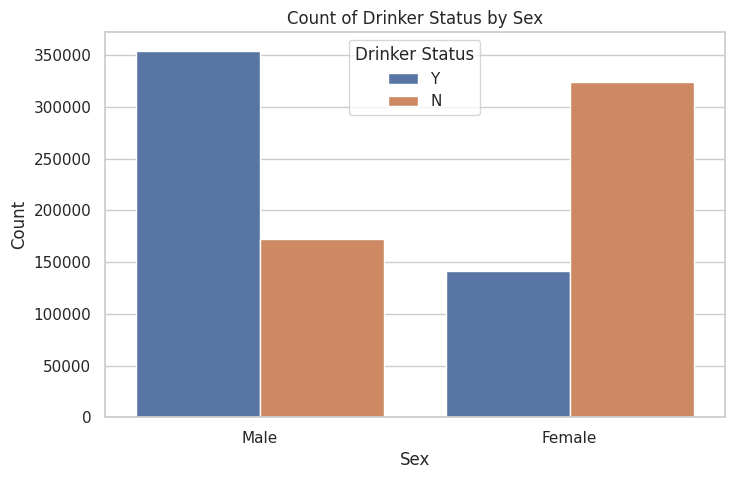

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', hue='DRK_YN', data=df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Drinker Status by Sex')
plt.legend(title='Drinker Status')
plt.show()

In [ ]:
Drinking_sex = df.groupby(['sex', 'DRK_YN'], as_index=False).agg(n = ('sex', 'count'))
Drinking_sex.head()

,sex,DRK_YN,n
0,Female,N,323760
1,Female,Y,141171
2,Male,N,172098
3,Male,Y,354317


From the countplot and table above, we can see that there is a higher proportion of males who drink alcohol.

Whereas in case of females, a minor proportion consumes alcohol.

From above analysis, we can see that `sex` depends on various features like `height`, `weight`, `waistline`, `DBP`, `SBP`, `tot_chole`, `Drk_yn`, `SMK_stat_type_cd`, etc.

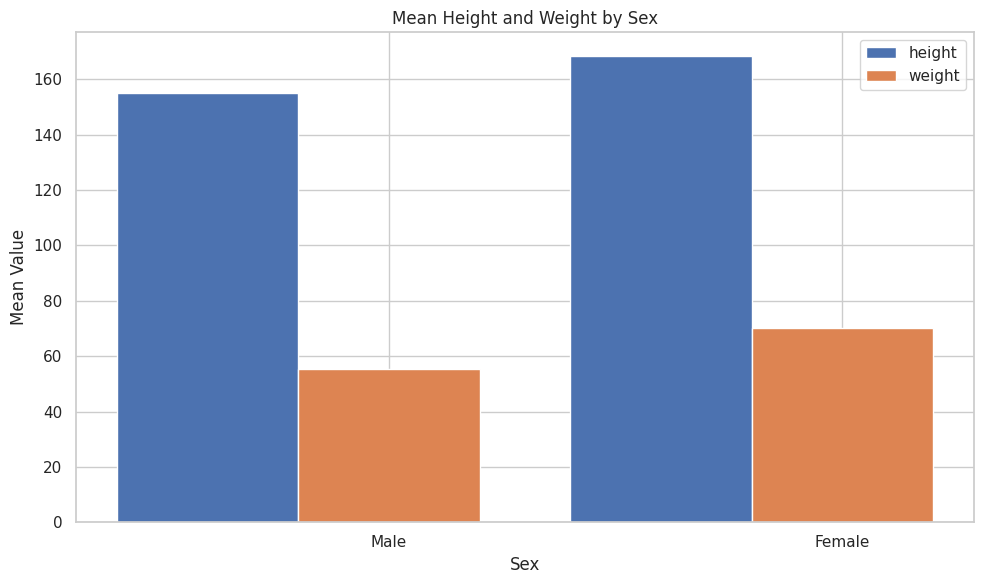

In [ ]:
categories = df['sex'].unique()
num_features = ['height', 'weight']

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(categories))

for i, feature in enumerate(num_features):
    means = df.groupby('sex')[feature].mean()
    rects = plt.bar(index + i * bar_width, means, bar_width, label=feature)

plt.xlabel('Sex')
plt.ylabel('Mean Value')
plt.title('Mean Height and Weight by Sex')
plt.xticks(index + bar_width, categories)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#calculating mean for each of the feature based on the gender
def find_mean(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

for col in numeric_columns:
    find_mean(df, "sex", col)

              age
sex              
Female  48.870349
Male    46.505314


            height
sex               
Female  155.101273
Male    168.546119


           weight
sex              
Female  55.538037
Male    70.125348


        waistline
sex              
Female  76.886523
Male    85.072493


        sight_left
sex               
Female    0.916992
Male      1.037220


        sight_right
sex                
Female     0.913098
Male       1.036130


               SBP
sex               
Female  119.705122
Male    124.841323


              DBP
sex              
Female  73.956434
Male    77.903990


              BLDS
sex               
Female   97.388273
Male    103.106004


         tot_chole
sex               
Female  196.480301
Male    194.741577


        HDL_chole
sex              
Female  61.643825
Male    52.779545


         LDL_chole
sex               
Female  113.236386
Male    112.862206


        triglyceride
sex                 
Female    108.622142
Male      152.914

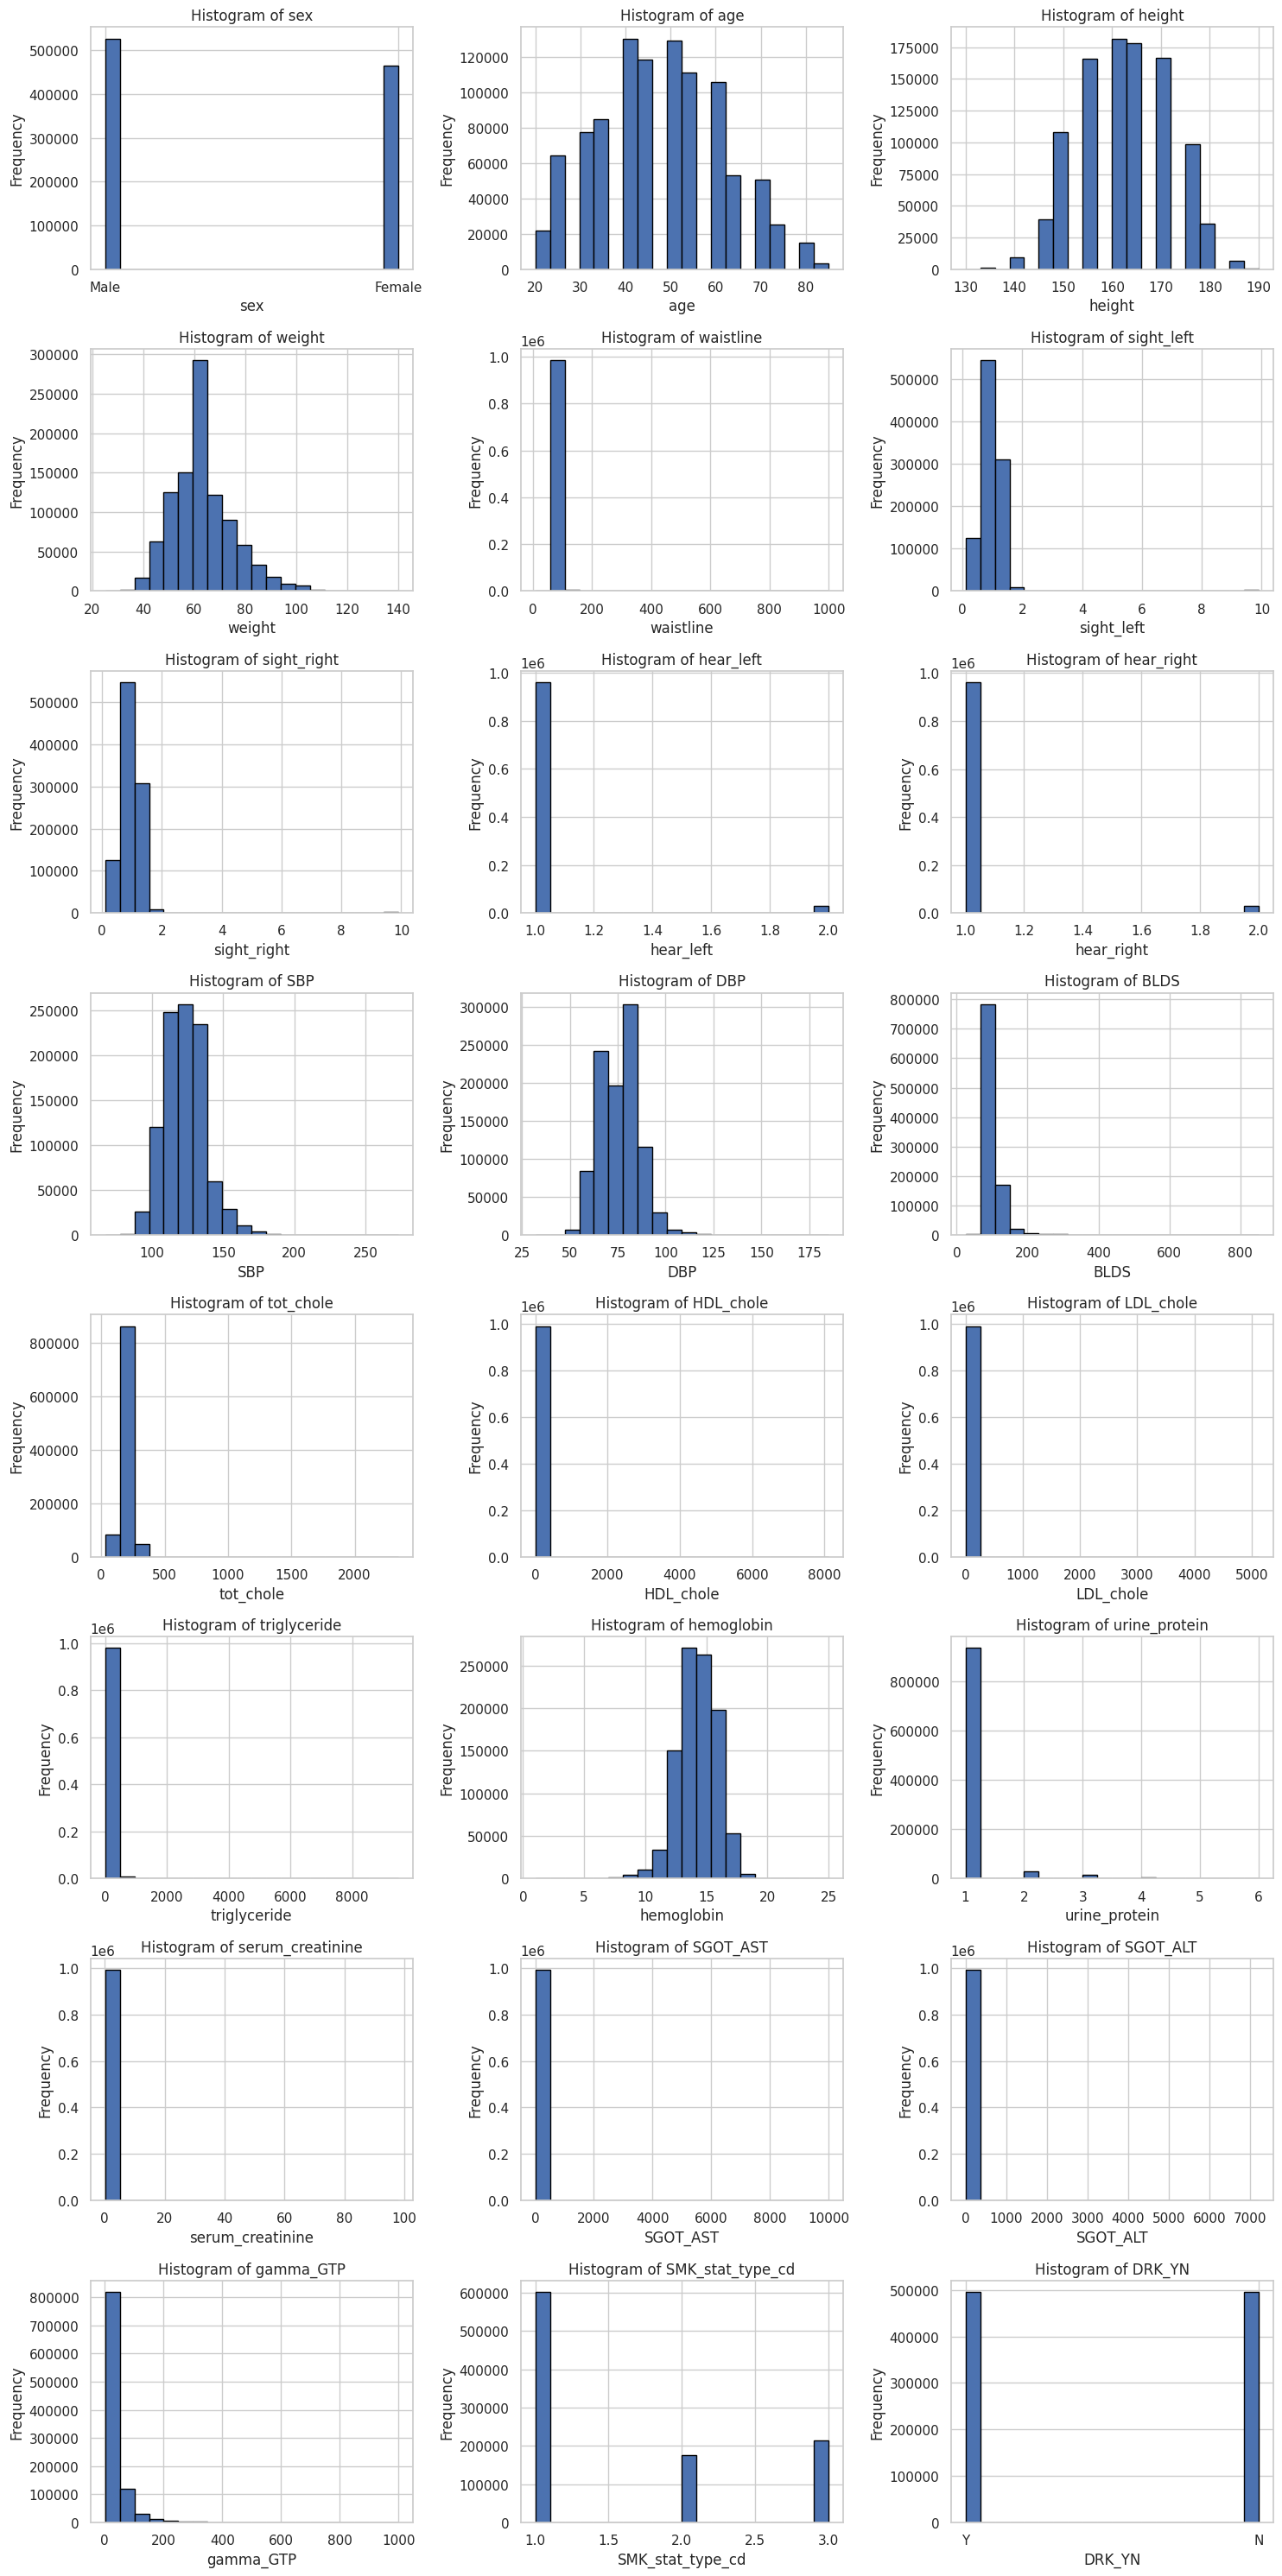

In [ ]:
features = df.columns

num_plots = len(features)
num_cols = 3
num_rows = (num_plots // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 30))
fig.subplots_adjust(hspace=0.5)

for i, feature in enumerate(features):
    ax = axes[i // num_cols, i % num_cols]

    ax.hist(df[feature], bins=20, edgecolor='black')

    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

#removing empty subplots
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

<ipython-input-43-46b29707759b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax[axid])
<ipython-input-43-46b29707759b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax[axid])
<ipython-input-43-46b29707759b>:6: UserWarning: 

`distplot` is a deprecated function and 

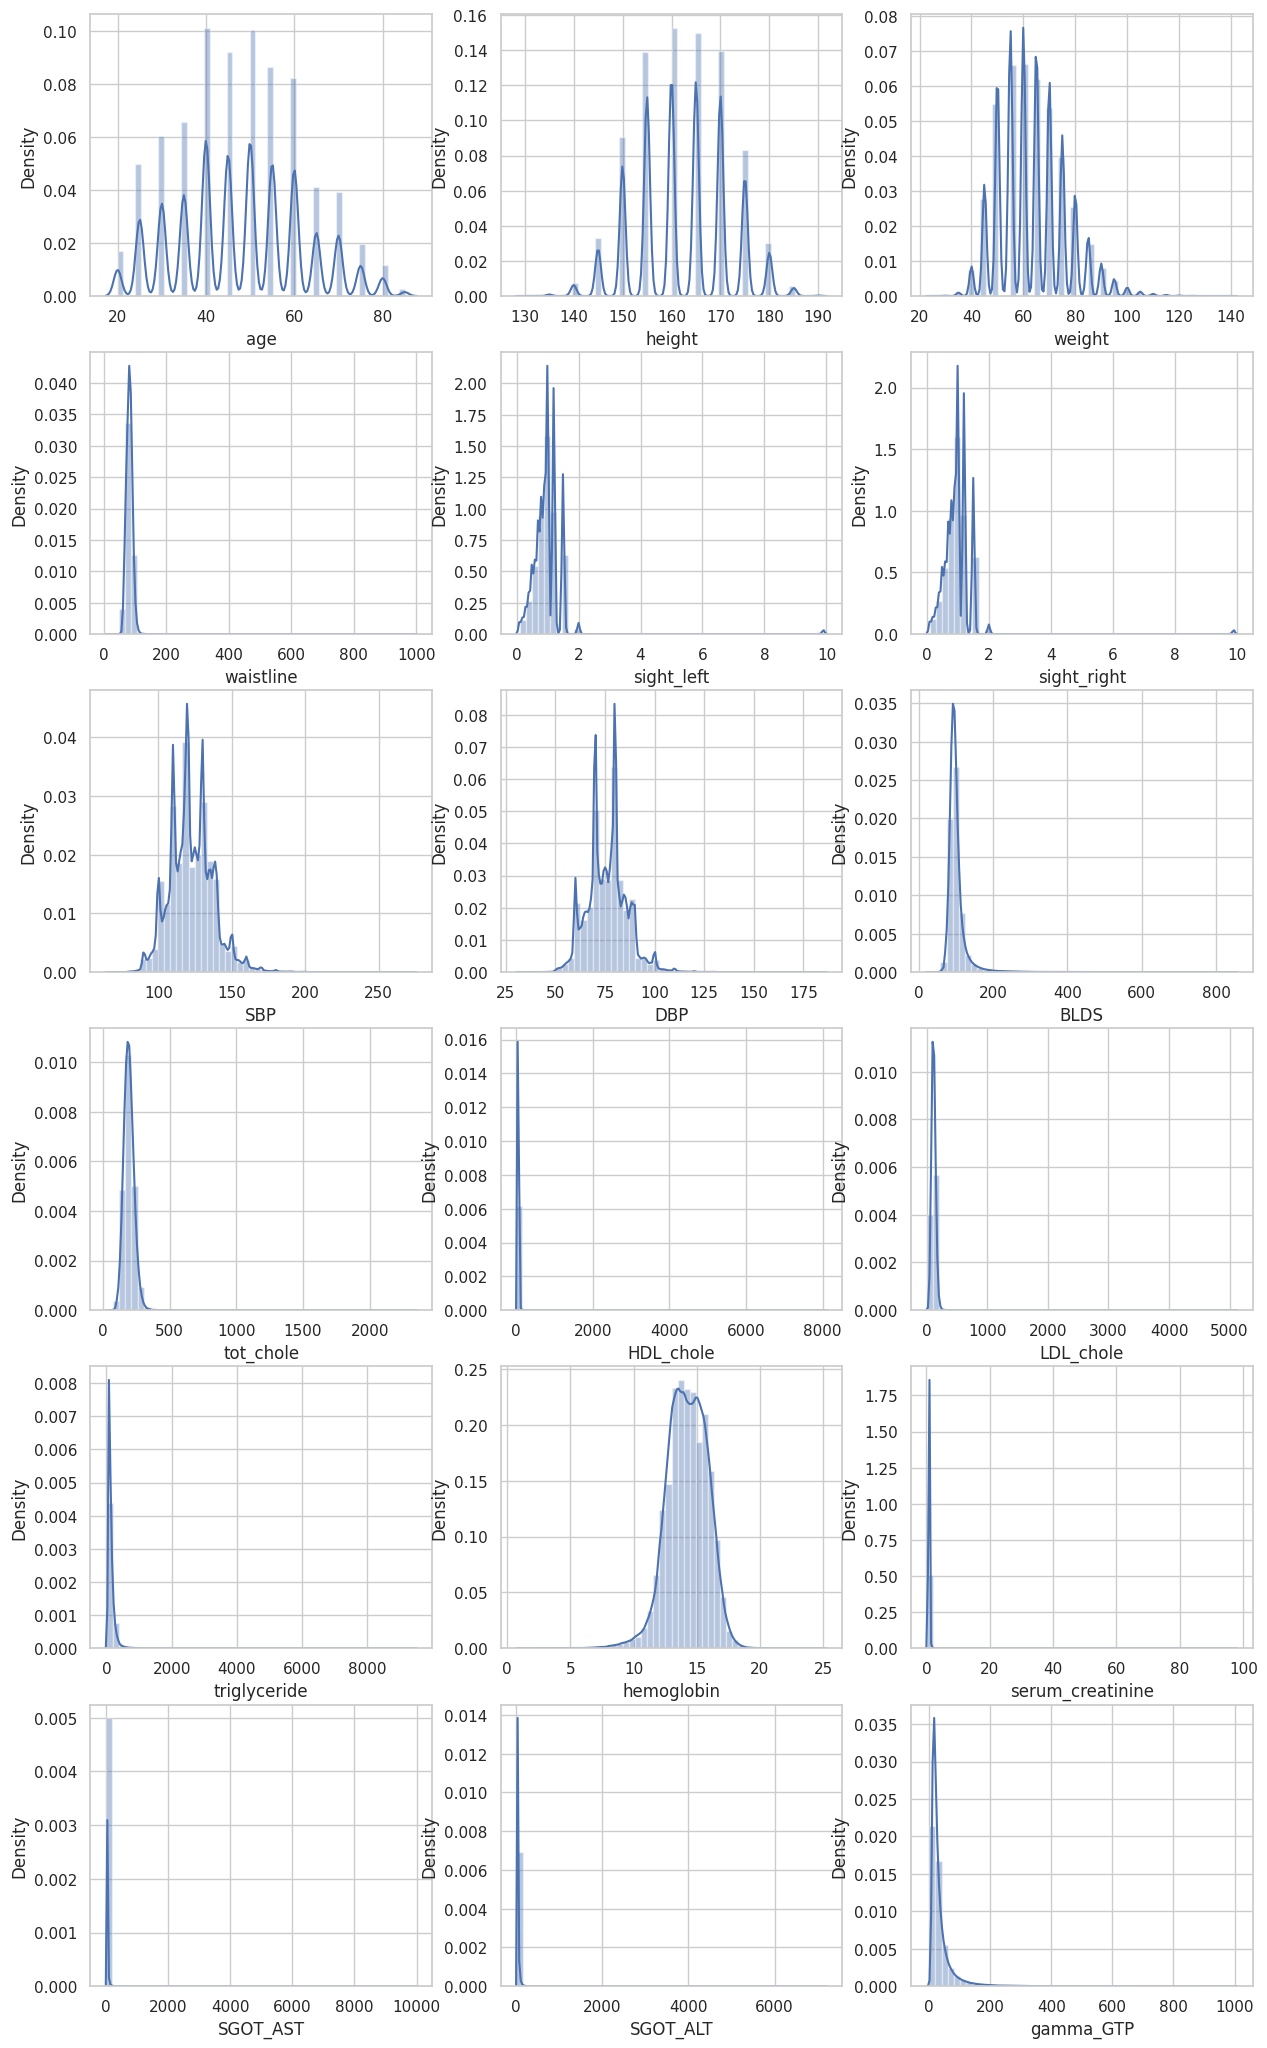

In [ ]:
# Plotting histgram for each numerical columns to get a better idea about the distribution of the numeric data
fig, ax = plt.subplots(7, 3, figsize=(15, 30))
ax=ax.ravel()

for axid, col in enumerate(numeric_columns):
    sns.distplot(df[col], ax=ax[axid])
    plt.title=col

# Removing the last 2 unused subplots
for i in range(len(numeric_columns), len(ax)):
    fig.delaxes(ax[i])

In [ ]:
numeric_df.skew()

age                   0.153653
height               -0.022737
weight                0.576557
waistline            26.788440
sight_left            9.994626
sight_right          10.033647
hear_left             5.365084
hear_right            5.463013
SBP                   0.482060
DBP                   0.400034
BLDS                  4.617377
tot_chole             1.556882
HDL_chole           104.577635
LDL_chole             5.251739
triglyceride          6.529373
hemoglobin           -0.383988
urine_protein         5.672491
serum_creatinine    111.022058
SGOT_AST            150.491690
SGOT_ALT             50.038872
gamma_GTP             7.718509
SMK_stat_type_cd      0.831428
dtype: float64

We can see that `waistline`, `HDL_chole`, `serum_creatinine`, `SGOT_AST`, `SGOT_ALT` have skewness. All of them are right skewed.

**Finding Nulls in Dataset**


In [ ]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

There are no null values in the dataset.

**Preprocessing**
---

Removing the outliers to reduce the biasness and to get a better accuracy.

In [11]:
def remove_outliers_iqr(dataframe, columns):

    trimmed_dataframe = dataframe.copy()

    for column in columns:
        Q1 = trimmed_dataframe[column].quantile(0.25)
        Q3 = trimmed_dataframe[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        trimmed_dataframe = trimmed_dataframe[(trimmed_dataframe[column] >= lower_bound) & (trimmed_dataframe[column] <= upper_bound)]

    return trimmed_dataframe

df_new = remove_outliers_iqr(df, numeric_columns)

In [12]:
df_new.shape

(631060, 24)

**Data Transformations**
---

In [1]:
from sklearn import preprocessing

In [3]:
le = preprocessing.LabelEncoder()

We now convert the categorical data into the numeric data in the following codes. This is done so as to make the dataset compatible with wider range of machine learning models. Also, performing mathematical operations becomes easier.

In [13]:
mapping = {}

for column in categorical_columns:
    df_new[column] = le.fit_transform(df_new[column])
    mapping[column] = dict(zip(le.classes_, le.transform(le.classes_)))

In [14]:
for column_name in categorical_columns:
    print(f'Mapping for column "{column_name}":')
    for key, value in mapping[column_name].items():
        print(f'{key}: {value}')
    print()

Mapping for column "sex":
Female: 0
Male: 1

Mapping for column "DRK_YN":
N: 0
Y: 1

Mapping for column "SMK_stat_type_cd":
1.0: 0
2.0: 1
3.0: 2

Mapping for column "urine_protein":
1.0: 0
2.0: 1
3.0: 2
4.0: 3
5.0: 4
6.0: 5

Mapping for column "hear_left":
1.0: 0
2.0: 1

Mapping for column "hear_right":
1.0: 0
2.0: 1



In [15]:
df_new.head(20)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,0,0,120.0,80.0,99.0,193.0,48.0,126.0,92.0,17.1,0,1.0,21.0,35.0,40.0,0,1
1,1,30,180,80,89.0,0.9,1.2,0,0,130.0,82.0,106.0,228.0,55.0,148.0,121.0,15.8,0,0.9,20.0,36.0,27.0,2,0
3,1,50,175,80,91.0,1.5,1.2,0,0,145.0,87.0,95.0,201.0,76.0,104.0,106.0,17.6,0,1.1,29.0,34.0,18.0,0,0
4,1,50,165,60,80.0,1.0,1.2,0,0,138.0,82.0,101.0,199.0,61.0,117.0,104.0,13.8,0,0.8,19.0,12.0,25.0,0,0
5,1,50,165,55,75.0,1.2,1.5,0,0,142.0,92.0,99.0,218.0,77.0,95.0,232.0,13.8,2,0.8,29.0,40.0,37.0,2,1
6,0,45,150,55,69.0,0.5,0.4,0,0,101.0,58.0,89.0,196.0,66.0,115.0,75.0,12.3,0,0.8,19.0,12.0,12.0,0,0
7,1,35,175,65,84.2,1.2,1.0,0,0,132.0,80.0,94.0,185.0,58.0,107.0,101.0,14.4,0,0.8,18.0,18.0,35.0,2,1
8,1,55,170,75,84.0,1.2,0.9,0,0,145.0,85.0,104.0,217.0,56.0,141.0,100.0,15.1,0,0.8,32.0,23.0,26.0,0,1
10,1,45,155,55,79.2,1.0,1.0,0,0,118.0,70.0,90.0,183.0,42.0,130.0,55.0,12.9,0,0.8,19.0,14.0,19.0,0,0
12,0,55,150,55,72.3,1.2,0.9,0,0,130.0,80.0,106.0,183.0,51.0,89.0,214.0,13.1,0,0.8,20.0,20.0,31.0,0,0
